In [1]:
import numpy as np
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

casia = np.load('./extraction/CASIA_labels.npy')

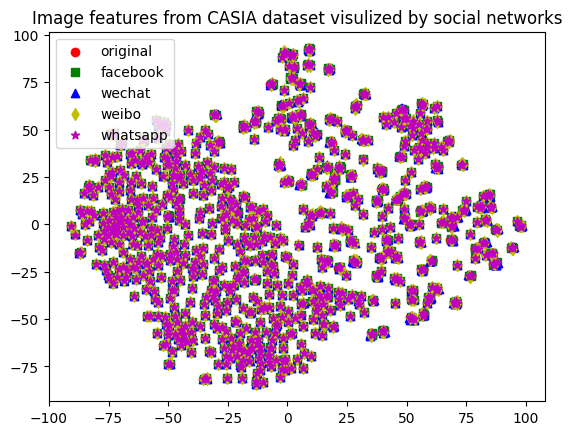

FileNotFoundError: [Errno 2] No such file or directory: './extraction/Columbia_features_test.npy'

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

for dataset, length in [('CASIA', 920), ('Columbia', 160), ('DSO', 100), ('NIST16', 564)]:

    feature = np.load('./extraction/%s_features_test.npy'%dataset)
    label = np.load('./extraction/%s_labels_test.npy'%dataset)


    original, facebook, wechat, weibo, whatsapp = [], [], [], [], []
    for i in range(len(label)):
        if label[i] == '%s'%dataset:
            if original == []:
                original = feature[i]
            else:
                original = np.vstack((original, feature[i]))
        elif label[i] == '%s_Facebook'%dataset:
            if facebook == []:
                facebook = feature[i]
            else:
                facebook = np.vstack((facebook, feature[i]))
        elif label[i] == '%s_Wechat'%dataset:
            if wechat == []:
                wechat = feature[i]
            else: 
                wechat = np.vstack((wechat, feature[i]))
        elif label[i] == '%s_Weibo'%dataset:
            if weibo == []:
                weibo = feature[i]
            else:
                weibo = np.vstack((weibo, feature[i]))
        else:
            if whatsapp == []:
                whatsapp = feature[i]
            else:
                whatsapp = np.vstack((whatsapp, feature[i]))

    ordered_feature = np.concatenate((original, facebook, wechat, weibo, whatsapp), axis = 0)

    tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = 200)
    embedded = tsne.fit_transform(ordered_feature)

    plt. scatter(embedded[:length, 0], embedded[:length, 1], c = 'r', marker = 'o', label = 'original')
    plt. scatter(embedded[length:length*2, 0], embedded[length:length*2, 1], c = 'g', marker = 's', label = 'facebook')
    plt. scatter(embedded[length*2:length*3, 0], embedded[length*2:length*3, 1], c = 'b', marker = '^', label = 'wechat')
    plt. scatter(embedded[length*3:length*4, 0], embedded[length*3:length*4, 1], c = 'y', marker = 'd', label = 'weibo')
    plt. scatter(embedded[length*4:length*5, 0], embedded[length*4:length*5, 1], c = 'm', marker = '*', label = 'whatsapp')
    plt.legend()
    plt.title('Image features from %s dataset visulized by social networks'%dataset)
    plt.savefig('./output/%s_tsne_test.png'%dataset)
    plt.show()

In [19]:
import os
import numpy as np
path = './dataset'
for dname in ['CASIA', 'Columbia', 'DSO', 'NIST16']:
    for pname in ['%s_Facebook'%dname, '%s_Wechat'%dname, '%s_Weibo'%dname, '%s_Whatsapp'%dname]:
        imgs = os.listdir(os.path.join(path, dname, pname))
        sizelist = []
        for img in imgs:
            if pname == '%s_Whatsapp'%dname:
                oripath = os.path.join(path, dname, dname, img.rsplit('.', 1)[0] + '.jpg')
            else:
                oripath = os.path.join(path, dname, dname, img)
            if dname == 'Columbia':
                oripath = os.path.join(path, dname, dname, img.rsplit('.', 1)[0] + '.tif')
            elif dname == 'DSO':
                oripath = os.path.join(path, dname, dname, img.rsplit('.', 1)[0] + '.png')                
            filepath = os.path.join(path, dname, pname, img)
            with open(oripath, "rb") as f:
                    orisize = len(f.read())
            with open(filepath, "rb") as f:
                    filesize = len(f.read())   
            sizelist.append(orisize-filesize)
        print('%s ave size difference: '%pname, np.mean(sizelist))

CASIA_Facebook ave size difference:  25427.820652173912
CASIA_Wechat ave size difference:  -24182.18586956522
CASIA_Weibo ave size difference:  22616.164130434783
CASIA_Whatsapp ave size difference:  20933.05
Columbia_Facebook ave size difference:  1629259.5875
Columbia_Wechat ave size difference:  1368132.11875
Columbia_Weibo ave size difference:  1635189.2875
Columbia_Whatsapp ave size difference:  1623138.41875
DSO_Facebook ave size difference:  3727604.15
DSO_Wechat ave size difference:  3534954.74
DSO_Weibo ave size difference:  3990747.92
DSO_Whatsapp ave size difference:  4094105.22
NIST16_Facebook ave size difference:  2117202.4929078016
NIST16_Wechat ave size difference:  2392609.794326241
NIST16_Weibo ave size difference:  2348052.283687943
NIST16_Whatsapp ave size difference:  2388054.14893617


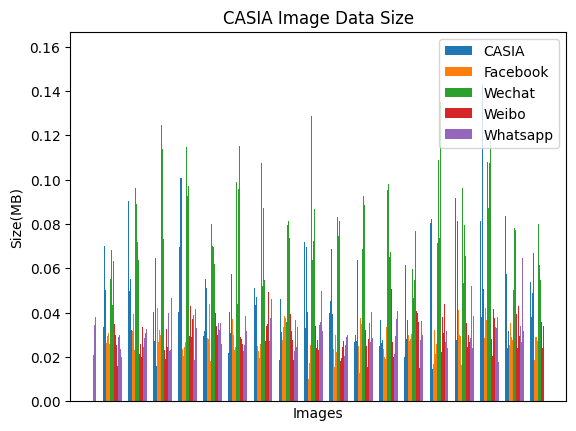

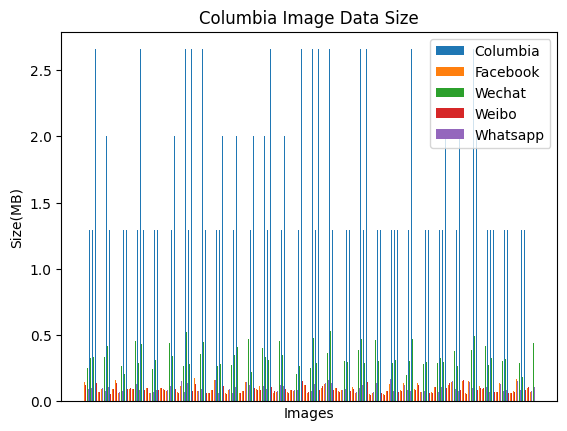

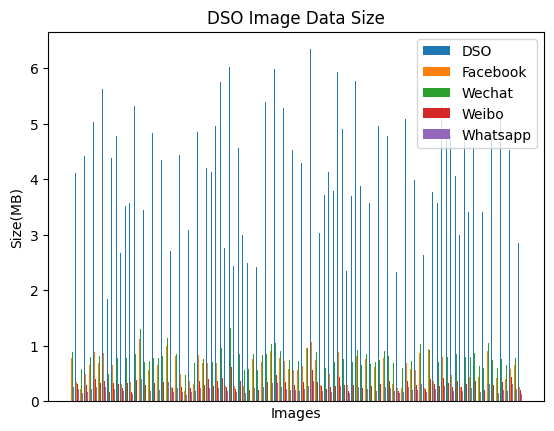

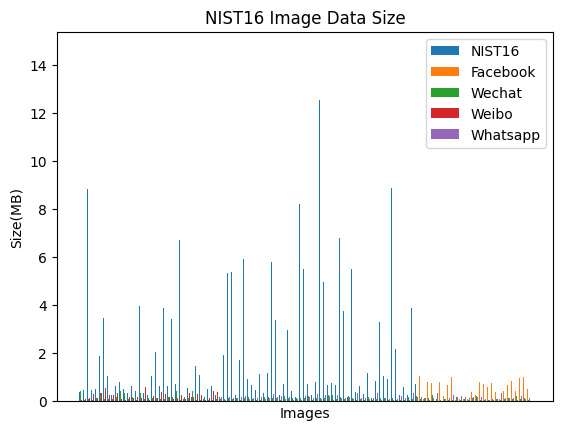

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
path = './dataset'
for dname in ['CASIA', 'Columbia', 'DSO', 'NIST16']:
    imgs = os.listdir(os.path.join(path, dname, dname))
    ori, fb, wc, wb, wa = [], [], [], [], []
    for img in imgs:
        oripath = os.path.join(path, dname, dname, img)
        with open(oripath, "rb") as f:
                ori.append(len(f.read())/1e6)
                
        if os.path.isfile(os.path.join(path, dname, '%s_Facebook'%dname, img.rsplit('.', 1)[0]+'.jpg')):
            with open(os.path.join(path, dname, '%s_Facebook'%dname, img.rsplit('.', 1)[0]+'.jpg'), "rb") as f:
                fb.append(len(f.read())/1e6)
        elif os.path.isfile(os.path.join(path, dname, '%s_Facebook'%dname, img.rsplit('.', 1)[0]+'.jpeg')):
            with open(os.path.join(path, dname, '%s_Facebook'%dname, img.rsplit('.', 1)[0]+'.jpeg'), "rb") as f:
                fb.append(len(f.read())/1e6)   
                
        if os.path.isfile(os.path.join(path, dname, '%s_Wechat'%dname, img.rsplit('.', 1)[0]+'.jpg')):
            with open(os.path.join(path, dname, '%s_Wechat'%dname, img.rsplit('.', 1)[0]+'.jpg'), "rb") as f:
                wc.append(len(f.read())/1e6)
        elif os.path.isfile(os.path.join(path, dname, '%s_Wechat'%dname, img.rsplit('.', 1)[0]+'.jpeg')):
            with open(os.path.join(path, dname, '%s_Wechat'%dname, img.rsplit('.', 1)[0]+'.jpeg'), "rb") as f:
                wc.append(len(f.read())/1e6)  
                
        if os.path.isfile(os.path.join(path, dname, '%s_Weibo'%dname, img.rsplit('.', 1)[0]+'.jpg')):
            with open(os.path.join(path, dname, '%s_Weibo'%dname, img.rsplit('.', 1)[0]+'.jpg'), "rb") as f:
                wb.append(len(f.read())/1e6)
        elif os.path.isfile(os.path.join(path, dname, '%s_Weibo'%dname, img.rsplit('.', 1)[0]+'.jpeg')):
            with open(os.path.join(path, dname, '%s_Weibo'%dname, img.rsplit('.', 1)[0]+'.jpeg'), "rb") as f:
                wb.append(len(f.read())/1e6)  
                
        if os.path.isfile(os.path.join(path, dname, '%s_Whatsapp'%dname, img.rsplit('.', 1)[0]+'.jpg')):
            with open(os.path.join(path, dname, '%s_Whatsapp'%dname, img.rsplit('.', 1)[0]+'.jpg'), "rb") as f:
                wa.append(len(f.read())/1e6)
        elif os.path.isfile(os.path.join(path, dname, '%s_Whatsapp'%dname, img.rsplit('.', 1)[0]+'.jpeg')):
            with open(os.path.join(path, dname, '%s_Whatsapp'%dname, img.rsplit('.', 1)[0]+'.jpeg'), "rb") as f:
                wa.append(len(f.read())/1e6)  
        
#     plt.plot(ori, label=dname)
#     plt.plot(fb, label='Facebook')
#     plt.plot(wc, label='Wechat')
#     plt.plot(wb, label='Weibo')
#     plt.plot(wa, label='Whatsapp')

#     plt.xlabel('Images')
#     plt.ylabel('Size(MB)')
#     plt.title('%s Image Size Distribution'%dname)
#     plt.legend(loc = 1)
#     plt.savefig('./output/%s_size_distribution.png'%dname, bbox_inches="tight")
#     plt.show()

    bar_width = 0.15
    x_pos = np.arange(len(ori))
    plt.bar(x_pos - 2 * bar_width, ori, width=bar_width, align='center', label=dname)
    plt.bar(x_pos - bar_width, fb, width=bar_width, align='center', label='Facebook')
    plt.bar(x_pos, wc, width=bar_width, align='center', label='Wechat')
    plt.bar(x_pos + bar_width, wb, width=bar_width, align='center', label='Weibo')
    plt.bar(x_pos + 2 * bar_width, wa, width=bar_width, align='center', label='Whatsapp')

    plt.xticks([],[])
    plt.xlabel('Images')
    plt.ylabel('Size(MB)')
    plt.title('%s Image Data Size'%dname)
    plt.legend(loc = 1)
    plt.savefig('./output/%s_size_data.png'%dname, bbox_inches="tight")
    plt.show()



In [4]:
import os
import numpy as np
from PIL import Image
import cv2
import pdb
path = './dataset'
def extract_quantization_tables(image_path):

    with Image.open(image_path) as image:

        if image.format != 'JPEG':
            print("The image is not in JPEG format.")
            return

        quantization_tables = image.quantization
        print(quantization_tables)
        for i, table in enumerate(quantization_tables):
            print(f"Quantization Table {i + 1}:")
            print(table)
            
for dname in ['CASIA', 'Columbia', 'DSO', 'NIST16']:
    for pname in ['%s_Facebook'%dname, '%s_Wechat'%dname, '%s_Weibo'%dname, '%s_Whatsapp'%dname]:
        imgs = os.listdir(os.path.join(path, dname, dname))
        for img in imgs:
            ori_path = os.path.join(path, dname, dname, img)
            if os.path.isfile(os.path.join(path, dname, pname, img)):      #casia, nist
                plaf_path = os.path.join(path, dname, pname, img)
            elif os.path.isfile(os.path.join(path, dname, pname, img.rsplit('.', 1)[0]+'.jpg')):    #other jpg
                plaf_path = os.path.join(path, dname, pname, img.rsplit('.', 1)[0]+'.jpg')
            elif os.path.isfile(os.path.join(path, dname, pname, img.rsplit('.', 1)[0]+'.jpeg')):    #whatsapp
                plaf_path = os.path.join(path, dname, pname, img.rsplit('.', 1)[0]+'.jpeg')
            else:
                print('error')
            
            ori_img_gray = np.float32(cv2.imread(ori_path, 0))
            plaf_img_gray = np.float32(cv2.imread(plaf_path, 0))
            
            ori_dct = cv2.dct(ori_img_gray)
            plaf_dct = cv2.dct(plaf_img_gray)
            
            print(ori_dct, plaf_dct)
            extract_quantization_tables(plaf_path)
            pdb.set_trace()



[[ 3.4539633e+04 -5.7792163e+02 -1.7335771e+03 ...  4.3260705e-01
  -5.4325967e+00 -2.5073738e+00]
 [ 5.0914828e+02  2.1367258e+03  1.0978839e+03 ...  3.8243589e+00
  -2.9190388e+00 -6.7233808e-02]
 [-1.1408262e+03  3.6347041e+03  2.1702334e+03 ... -3.7487987e-01
  -5.0663157e+00  1.6977795e+01]
 ...
 [-7.0085907e+00 -7.7667489e+00  3.1869245e-01 ...  7.6746896e-02
  -1.1584967e+00 -1.6409387e-01]
 [ 1.9289136e+00  1.0947953e+01  5.5951486e+00 ... -2.9327381e-01
  -1.4204698e+00 -1.8628125e+00]
 [ 4.9991632e+00  4.6366439e+00 -7.3404436e+00 ... -7.5547069e-01
  -1.3740909e+00  2.4104583e+00]] [[ 3.4539633e+04 -5.7792163e+02 -1.7335771e+03 ...  4.3260705e-01
  -5.4325967e+00 -2.5073738e+00]
 [ 5.0914828e+02  2.1367258e+03  1.0978839e+03 ...  3.8243589e+00
  -2.9190388e+00 -6.7233808e-02]
 [-1.1408262e+03  3.6347041e+03  2.1702334e+03 ... -3.7487987e-01
  -5.0663157e+00  1.6977795e+01]
 ...
 [-7.0085907e+00 -7.7667489e+00  3.1869245e-01 ...  7.6746896e-02
  -1.1584967e+00 -1.6409387e-01]

In [18]:
from PIL import Image
from PIL.ExifTags import TAGS


def get_exif(image_file_path):
    exif_table = {}
    image = Image.open(image_file_path)
    info = image.getexif()
    for tag, value in info.items():
        decoded = TAGS.get(tag, tag)
        exif_table[decoded] = value
    return exif_table

import pandas as pd 
import os

for dname in ['CASIA', 'Columbia', 'DSO', 'NIST16']:
    for pname in ['%s_Facebook'%dname, '%s_Wechat'%dname, '%s_Weibo'%dname, '%s_Whatsapp'%dname]:
        exif0 = []
        exif1 = []
        imgs = os.listdir(os.path.join(path, dname, dname))
        for img in imgs:
            ori_path = os.path.join(path, dname, dname, img)
            exif0.append(get_exif(ori_path))
            
            if os.path.isfile(os.path.join(path, dname, pname, img)):      #casia, nist
                plaf_path = os.path.join(path, dname, pname, img)
            elif os.path.isfile(os.path.join(path, dname, pname, img.rsplit('.', 1)[0]+'.jpg')):    #other jpg
                plaf_path = os.path.join(path, dname, pname, img.rsplit('.', 1)[0]+'.jpg')
            elif os.path.isfile(os.path.join(path, dname, pname, img.rsplit('.', 1)[0]+'.jpeg')):    #whatsapp
                plaf_path = os.path.join(path, dname, pname, img.rsplit('.', 1)[0]+'.jpeg')
            else:
                print('error')
            exif1.append(get_exif(plaf_path))  
        print( pname, exif0)
        break
            


CASIA_Facebook [{'ColorSpace': 65535, 'ExifImageWidth': 384, 'ExifImageHeight': 256, 'ResolutionUnit': 2, 'ExifOffset': 164, 'Software': 'Adobe Photoshop CS2 Windows', 'Orientation': 1, 'DateTime': '2008:10:09 20:15:15', 'XResolution': (960000, 10000), 'YResolution': (960000, 10000)}, {'ColorSpace': 65535, 'ExifImageWidth': 384, 'ExifImageHeight': 256, 'ResolutionUnit': 2, 'ExifOffset': 164, 'Software': 'Adobe Photoshop CS2 Windows', 'Orientation': 1, 'DateTime': '2008:10:08 13:18:49', 'XResolution': (960000, 10000), 'YResolution': (960000, 10000)}, {}, {}, {}, {'ColorSpace': 65535, 'ExifImageWidth': 384, 'ExifImageHeight': 256, 'ResolutionUnit': 2, 'ExifOffset': 164, 'Software': 'Adobe Photoshop CS2 Windows', 'Orientation': 1, 'DateTime': '2008:09:21 21:23:19', 'XResolution': (720000, 10000), 'YResolution': (720000, 10000)}, {}, {'ColorSpace': 65535, 'ExifImageWidth': 384, 'ExifImageHeight': 256, 'ResolutionUnit': 2, 'ExifOffset': 164, 'Software': 'Adobe Photoshop CS2 Windows', 'Orien

Columbia_Facebook [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
DSO_Facebook [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {},

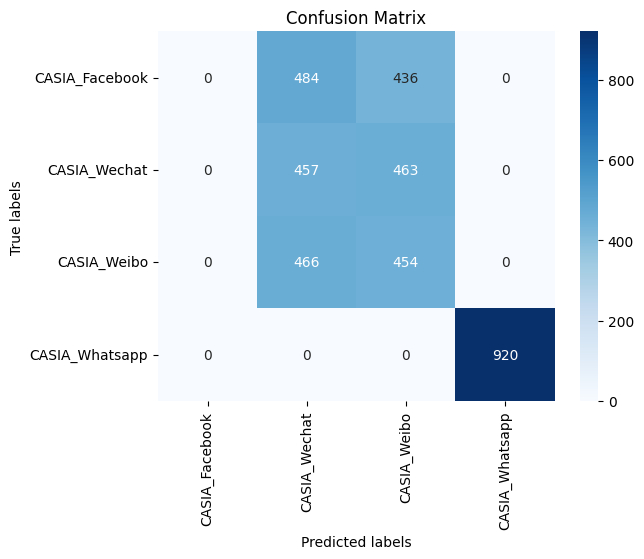

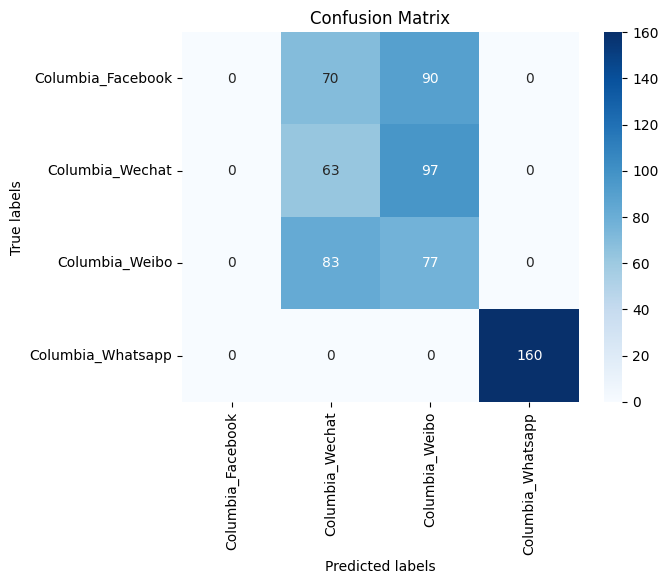

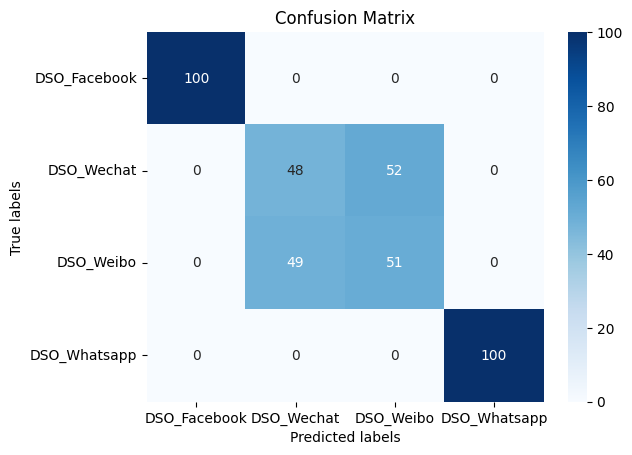

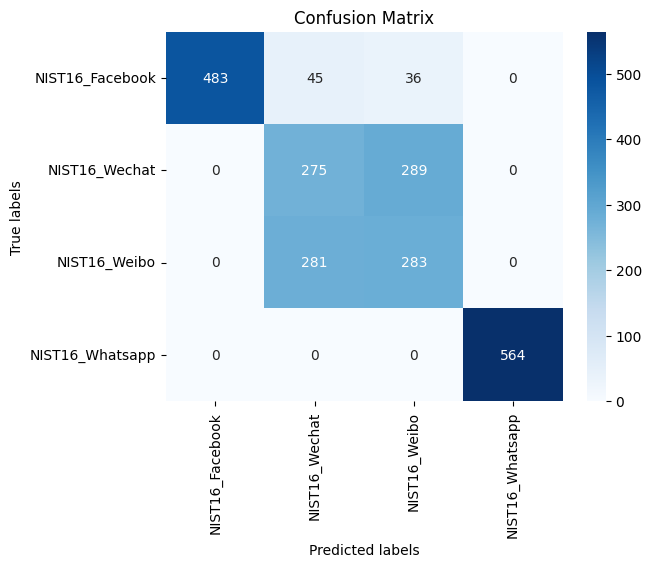

In [12]:
import os
from PIL import Image
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

path = './dataset'

for dname in ['CASIA', 'Columbia', 'DSO', 'NIST16']:
    pred_list = []
    gt_list = []
    for pname in ['%s_Facebook'%dname, '%s_Wechat'%dname, '%s_Weibo'%dname, '%s_Whatsapp'%dname]:
        imgs = os.listdir(os.path.join(path, dname, pname))
        for img in imgs:
            gt_list.append(pname)
            
            if img.rsplit('.', 1)[1] == 'jpeg':
                pred_list.append('%s_Whatsapp'%dname)
            else:
                img = Image.open(os.path.join(path, dname, pname, img))
                if max(img.size) == 2048:
                    pred_list.append('%s_Facebook'%dname)
                else:
                    pred_list.append(random.choice(['%s_Weibo'%dname, '%s_Wechat'%dname]))
    cm = confusion_matrix(gt_list, pred_list)
    labels = ['%s_Facebook'%dname, '%s_Wechat'%dname, '%s_Weibo'%dname, '%s_Whatsapp'%dname]
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.savefig('./output/%s_confusion_matrix.png'%dname, bbox_inches="tight")
    plt.show()    
        

In [83]:
from PIL import Image
import numpy as np
import cv2
import math
from statistics import mode

def calculate_probability(s, n, e):
    if s >= n/2:
        return 0.0
    

    log_term = n * math.log10((s*e)/n) + (-1/2) * math.log10(2*math.pi*n) 
    
    exp_term = -2 * (((n/2) - s)**2 / n) * math.log10(math.e)
    
    probability = 10**(min(log_term, exp_term))
    
    return probability

def obtain_QT(img_path):
    img = np.array(Image.open(img_path))
    QT, NFA = [], []
    Y = np.round(0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2])

    height, width= Y.shape[:2]
    block_size = 8
    block_rows = height // block_size
    block_cols = width // block_size

    for c in range(1,64):
        for q in range(1, 256):
            s, n = 0, 0
            for row in range(0, block_rows):
                for col in range(0, block_cols):
                    tmp = np.float32(Y[row*block_size:(row+1)*block_size, col*block_size:(col+1)*block_size])
                    v = cv2.dct(tmp)[c]
                    V = np.round(v/q)
                    if V.all() != 0:
                        e = 2*np.linalg.norm((v/q) - V, axis = 0)
                        s = s + e
                        n = n + 1

            nfa = 64*63*255*(calculate_probability(s, n, e))
            print(nfa, NFA, c)
            if nfa <= 1 and nfa < NFA[c]:
                Q[c] = q
                NFA[c] = nfa
    return QT

path = './dataset'

for dname in ['CASIA', 'Columbia', 'DSO', 'NIST16']:
    QT_list = []
    label_list = []
    for pname in ['%s_Facebook'%dname, '%s_Wechat'%dname, '%s_Weibo'%dname, '%s_Whatsapp'%dname]:
        imgs = os.listdir(os.path.join(path, dname, pname))
        for img in imgs:
            img_path = os.path.join(path, dname, pname, img)
            qt = obtain_QT(img_path)
            QT_list.append(qt)
            label_list.append(pname)

In [84]:
path = './dataset'

for dname in ['CASIA', 'Columbia', 'DSO', 'NIST16']:
    QT_list = []
    label_list = []
    for pname in ['%s_Facebook'%dname, '%s_Wechat'%dname, '%s_Weibo'%dname, '%s_Whatsapp'%dname]:
        imgs = os.listdir(os.path.join(path, dname, pname))
        for img in imgs:
            img_path = os.path.join(path, dname, pname, img)
            qt = obtain_QT(img_path)
            QT_list.append(qt)
            label_list.append(pname)

0.0 [] 1


IndexError: list index out of range